<a href="https://colab.research.google.com/github/David-Kumawat/Credit-Card-Default-Prediction-Classification/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Credit Card Default Detection



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Problem Statement**


The aim is to develop a system or model that can accurately identify and prevent fraudulent transactions on credit cards. The primary objective is to protect both the bank and its customers from financial losses and potential security breaches. Credit card fraud can lead to significant financial damages, loss of customer trust, and damage to the bank's reputation. Therefore, it is crucial to employ effective fraud detection mechanisms to detect and prevent fraudulent activities.



# ***Let's Begin !***


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

defaulter = pd.read_excel('/content/drive/MyDrive/Supervised Learning/Classification/default of credit card clients.xls')

### Dataset First View

In [3]:
# Dataset First View
pd.set_option('display.max_columns',None)
defaulter.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

defaulter.shape

(30001, 25)

### Dataset Information

In [5]:
# Dataset Info

defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [6]:
from pandas.core.base import duplicated
# Dataset Duplicate Values Count

len(defaulter[defaulter.duplicated()])

0



#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count

print(defaulter.isnull().sum())

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64


<Axes: >

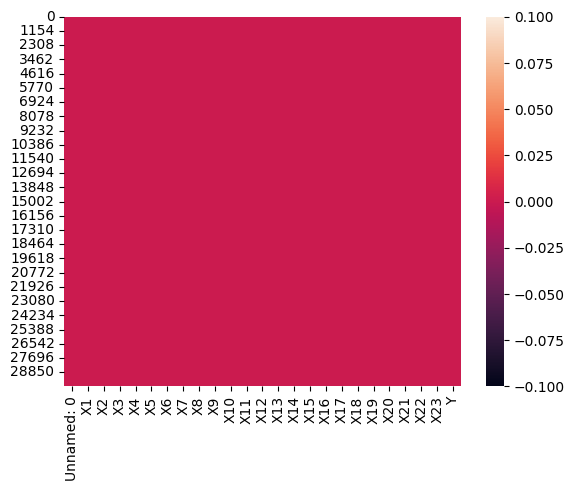

In [8]:
# Visualizing the missing values

sns.heatmap(defaulter.isnull())

### What did you know about your dataset?

**Answer:** The dataset given is from the bank industry, and we have to analyze the default of our clients. In Dataset, I have 30001 Rows and 25 Columns and All 25 Columns are Object Data types. The Dataset does not have duplicated values and also does not have null values in it.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns

defaulter.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [10]:
# Droping First Row of the Dataframe

defaulter = defaulter.drop(0,axis=0)

In [11]:
# Change the Variable Datatype Object to Numeric

defaulter = defaulter.apply(pd.to_numeric)

In [12]:
# Dataset Describe

defaulter.describe(include='all')

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

###There are 25 variables:

####ID: ID of each client
####LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
####SEX: Gender (1=male, 2=female)
####EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
####MARRIAGE: Marital status (1=married, 2=single, 3=others)
####AGE: Age in years
####PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
####PAY_2: Repayment status in August, 2005 (scale same as above)
####PAY_3: Repayment status in July, 2005 (scale same as above)
####PAY_4: Repayment status in June, 2005 (scale same as above)
####PAY_5: Repayment status in May, 2005 (scale same as above)
####PAY_6: Repayment status in April, 2005 (scale same as above)
####BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
####BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
####BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
####BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
####BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
####BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
####PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
####PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
####PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
####PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
####PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
####PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
####default.payment.next.month: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for i in defaulter.columns.tolist():
  print("No. of unique values in ",i,"is",defaulter[i].nunique(),".")

No. of unique values in  Unnamed: 0 is 30000 .
No. of unique values in  X1 is 81 .
No. of unique values in  X2 is 2 .
No. of unique values in  X3 is 7 .
No. of unique values in  X4 is 4 .
No. of unique values in  X5 is 56 .
No. of unique values in  X6 is 11 .
No. of unique values in  X7 is 11 .
No. of unique values in  X8 is 11 .
No. of unique values in  X9 is 11 .
No. of unique values in  X10 is 10 .
No. of unique values in  X11 is 10 .
No. of unique values in  X12 is 22723 .
No. of unique values in  X13 is 22346 .
No. of unique values in  X14 is 22026 .
No. of unique values in  X15 is 21548 .
No. of unique values in  X16 is 21010 .
No. of unique values in  X17 is 20604 .
No. of unique values in  X18 is 7943 .
No. of unique values in  X19 is 7899 .
No. of unique values in  X20 is 7518 .
No. of unique values in  X21 is 6937 .
No. of unique values in  X22 is 6897 .
No. of unique values in  X23 is 6939 .
No. of unique values in  Y is 2 .
